# Data Analytics and Data Driven Decision - Final Project.

### Why this dataset? # TODO

### Description of each column with its meaning. # TODO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [2]:
reviews_df = pd.read_csv('Hotel_Reviews.csv')
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
reviews_df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [4]:
reviews_df.count()

Hotel_Address                                 515738
Additional_Number_of_Scoring                  515738
Review_Date                                   515738
Average_Score                                 515738
Hotel_Name                                    515738
Reviewer_Nationality                          515738
Negative_Review                               515738
Review_Total_Negative_Word_Counts             515738
Total_Number_of_Reviews                       515738
Positive_Review                               515738
Review_Total_Positive_Word_Counts             515738
Total_Number_of_Reviews_Reviewer_Has_Given    515738
Reviewer_Score                                515738
Tags                                          515738
days_since_review                             515738
lat                                           512470
lng                                           512470
dtype: int64

One of the first thing we've noticed is that some row doesn't have latitude and longitude attributes. First we check that the latitude and longitude attribute are null for each row of the dataframe that refers to this specific hotel. In this way we can be certain that we are missing the coordinates of this hotel for every review's instance (not only for a few of them).

In [5]:
reviews_df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                            True
lng                                            True
dtype: bool

In [6]:
missing_lat_hotels = reviews_df[reviews_df['lat'].isnull()]['Hotel_Name'].unique()
missing_lat_hotels
# reviews_df[reviews_df['lng'].isnull()]['Hotel_Name'].unique()

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

In [7]:
for hotel in range(len(missing_lat_hotels)):
    assert reviews_df[reviews_df['Hotel_Name'] == missing_lat_hotels[hotel]]['lat'].isnull().all() == True

In [8]:
missing_lng_hotels = reviews_df[reviews_df['lng'].isnull()]['Hotel_Name'].unique()
missing_lng_hotels

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

In [9]:
for hotel in range(len(missing_lng_hotels)):
    assert reviews_df[reviews_df['Hotel_Name'] == missing_lng_hotels[hotel]]['lat'].isnull().all() == True

We fill the empty cells by searching online the geospatial coordinates associated to each one of the hotels. Then we store these information info our dataframe and we check again that now it is full with all its information.

In [10]:
missing_infos = {'Fleming s Selection Hotel Wien City': {'lat':48.209270, 'lng':16.353479},
    'Hotel City Central':{'lat':48.2136,'lng':16.3799},
    'Hotel Atlanta':{'lat':48.210033,'lng':16.363449},
    'Maison Albar Hotel Paris Op ra Diamond':{'lat':48.875343,'lng':2.323358},
    'Hotel Daniel Vienna':{'lat':48.1888,'lng':16.3840},
    'Hotel Pension Baron am Schottentor':{'lat':48.216701,'lng':16.359819},
    'Austria Trend Hotel Schloss Wilhelminenberg Wien':{'lat':48.2195,'lng':16.2856},
    'Derag Livinghotel Kaiser Franz Joseph Vienna':{'lat':48.245998,'lng':16.341080},
    'NH Collection Barcelona Podium':{'lat':41.3916,'lng':2.1779},
    'City Hotel Deutschmeister':{'lat':48.22088,'lng':16.36663},
    'Hotel Park Villa':{'lat':48.233577,'lng':16.345682},
    'Cordial Theaterhotel Wien':{'lat':48.209488,'lng':16.351585},
    'Holiday Inn Paris Montmartre':{'lat':48.888920,'lng':2.333087},
    'Roomz Vienna':{'lat':48.186605,'lng':16.420643},
    'Mercure Paris Gare Montparnasse':{'lat':48.840012,'lng':2.323595},
    'Renaissance Barcelona Hotel':{'lat':41.392673,'lng':2.167494},
    'Hotel Advance': {'lat':41.383308,'lng':2.162828}
}

In [11]:
nan_df = reviews_df[reviews_df.isnull().any(axis=1)]

for index, row in nan_df.iterrows():
    reviews_df.at[index, 'lat'] = missing_infos[row['Hotel_Name']]['lat']
    reviews_df.at[index, 'lng'] = missing_infos[row['Hotel_Name']]['lng']

In [12]:
reviews_df.count()

Hotel_Address                                 515738
Additional_Number_of_Scoring                  515738
Review_Date                                   515738
Average_Score                                 515738
Hotel_Name                                    515738
Reviewer_Nationality                          515738
Negative_Review                               515738
Review_Total_Negative_Word_Counts             515738
Total_Number_of_Reviews                       515738
Positive_Review                               515738
Review_Total_Positive_Word_Counts             515738
Total_Number_of_Reviews_Reviewer_Has_Given    515738
Reviewer_Score                                515738
Tags                                          515738
days_since_review                             515738
lat                                           515738
lng                                           515738
dtype: int64

In [13]:
reviews_df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                           False
lng                                           False
dtype: bool

In [14]:
dataframe_length = reviews_df['Hotel_Name'].count()

In [15]:
## TODO Clean data columns and store as pickle file.

In [16]:
reviews_df['Hotel_Country'] = ""
for index, row in reviews_df.iterrows():
    reviews_df.at[index,'Hotel_Country'] = row.Hotel_Address.split()[-1]

In [17]:
reviews_df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands


#### Preprocessing heading to exploratory analysis
In the following lines of code we adapt the dataset fields' type to the one which suites well for programming (?).

In [18]:
# Convert date type from string to datetime
reviews_df['Review_Date'] = pd.to_datetime(reviews_df['Review_Date'])

In [19]:
# Delete "days" word from 'days_since_review' column
cleaned_days = [int(re.sub(r'[a-zA-Z]', '',row)) for row in reviews_df['days_since_review']]
reviews_df['days_since_review'] = cleaned_days


In [20]:
# Remove white spaces at the beginning and end of reviewer nationality fields
cleaned_nat = [str(row).strip() for row in reviews_df['Reviewer_Nationality']]
reviews_df['Reviewer_Nationality'] = cleaned_nat


# Exploratory Analysis
In this section we explore our data, we ask ourselves questions that we hope to answer by investigating the data that we have.

#### Question: How many hotels do we have in the dataset? 
#### Question: What is the hotel with most reviews?

In [21]:
reviews_df['Hotel_Name'].describe()

count                                         515738
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

We have 1492 different hotels in the dataset and the most frequent one (i.e. the one for which we have the major number of reviews) is the **Britannia International Hotel Canary Wharf** with 4789 reviews.

#### Question:  How many reviews do we have for each one of the reviewed hotels? 

In [22]:
reviews_df['Hotel_Name'].value_counts().head(20)

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
M by Montcalm Shoreditch London Tech City            2155
DoubleTree by Hilton London Docklands Riverside      2147
St James Court

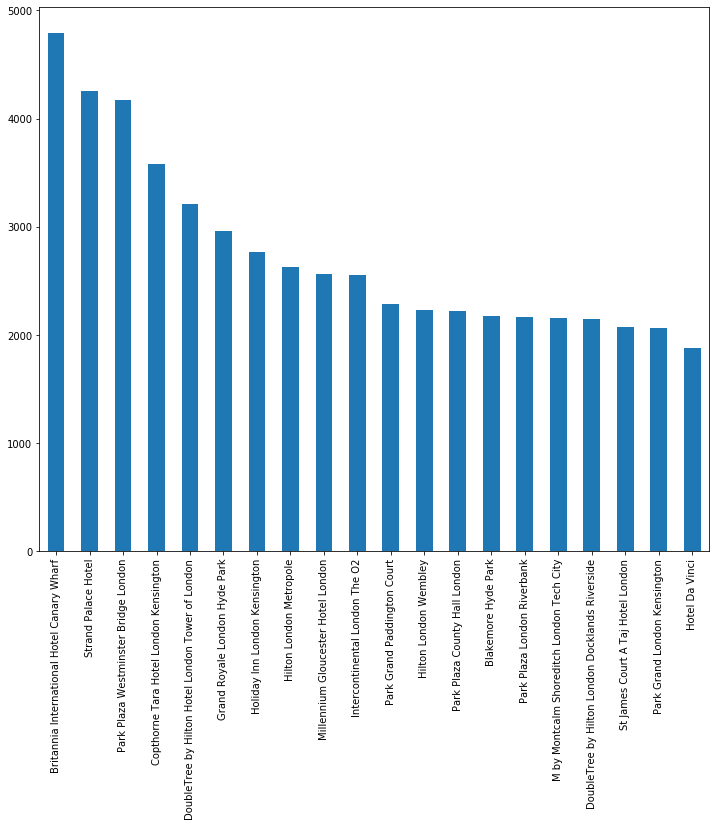

In [23]:
reviews_df['Hotel_Name'].value_counts().head(20).plot(kind='bar',figsize=(12,10))

#### Question: What is the time range of these reviews? 

In [24]:
reviews_df['Review_Date'].min()

Timestamp('2015-08-04 00:00:00')

In [25]:
reviews_df['Review_Date'].max()

Timestamp('2017-08-03 00:00:00')

#### Question: Which are the most frequent days for reviewers?

In [26]:
reviews_df['Review_Date'].value_counts().head(10)

2017-08-02    2585
2016-09-15    2308
2017-04-05    2284
2016-08-30    1963
2016-02-16    1940
2016-07-05    1904
2016-05-31    1860
2016-12-05    1803
2016-07-12    1801
2016-08-02    1783
Name: Review_Date, dtype: int64

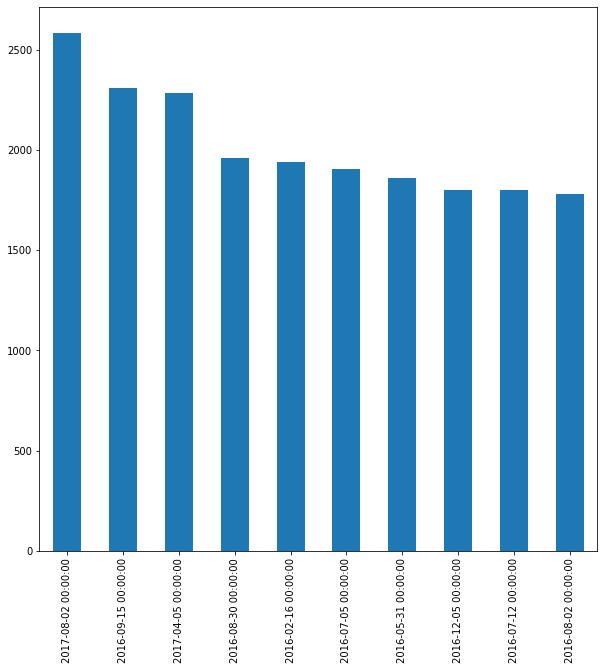

In [27]:
reviews_df['Review_Date'].value_counts().head(10).plot(kind='bar', figsize=(10,10))

#### Question: What is the date in which the data has been scraped?

In [28]:
reviews_df.query('days_since_review == 0').iloc[0]['Review_Date']

Timestamp('2017-08-03 00:00:00')

#### Question: How are the average scores distributed?

In [29]:
reviews_df['Average_Score'].describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

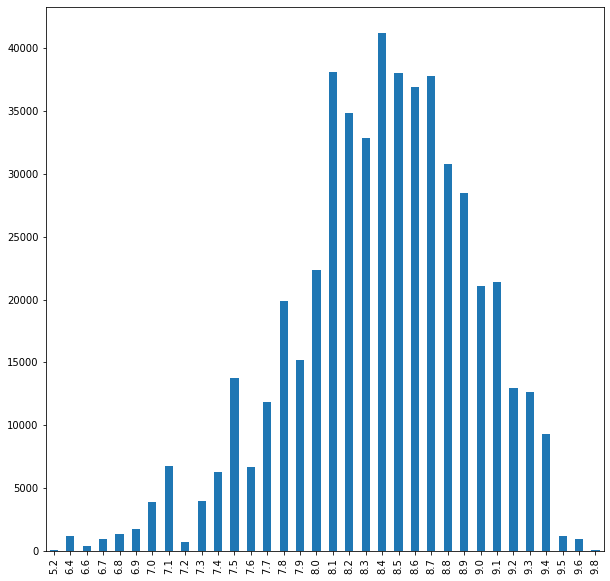

In [30]:
reviews_df['Average_Score'].value_counts().sort_index().plot(kind='bar',figsize=(10,10))

We see that most of the hotels lie between an average score of 8.0 and 9.0.

In [31]:
t = reviews_df['Average_Score'].value_counts().sort_index()[8.0 : 9.0].sum()
t

362629

In [32]:
percentage = t / reviews_df['Average_Score'].count() * 100
print("In this range of score falls the {}% of the reviews.".format(percentage))

In this range of score falls the 70.3126393633977% of the reviews.


#### Question: How is the nationality of the reviewers distribitued?

In [33]:
reviews_df['Reviewer_Nationality'].value_counts().head(10)

United Kingdom              245246
United States of America     35437
Australia                    21686
Ireland                      14827
United Arab Emirates         10235
Saudi Arabia                  8951
Netherlands                   8772
Switzerland                   8678
Germany                       7941
Canada                        7894
Name: Reviewer_Nationality, dtype: int64

We've noticed that a lot of the reviews are from United Kingdom people.

In [34]:
reviews_df['Reviewer_Nationality'].value_counts().iloc[0] / dataframe_length * 100

47.55243941691324

#### Question: How many reviews are from italian people?

In [36]:
reviews_df['Reviewer_Nationality'].value_counts()['Italy']

6114

#### Question: How is the number of reviews made by the reviewers distributed?

In [38]:
reviews_df['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().head(10)

1     154640
2      67077
3      46845
4      35026
5      27629
6      22621
7      18614
8      16150
9      13545
10     11717
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: int64

In [39]:
percentage = reviews_df['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().iloc[0]
print("The percentage of first review in the dataframe is {:.2f}%".format(percentage / dataframe_length * 100))

The percentage of first review in the dataframe is 29.98%


#### Question: Where are the reviewed hotels located?

In [40]:
reviews_df['Hotel_Country'].describe()

count      515738
unique          6
top       Kingdom
freq       262301
Name: Hotel_Country, dtype: object

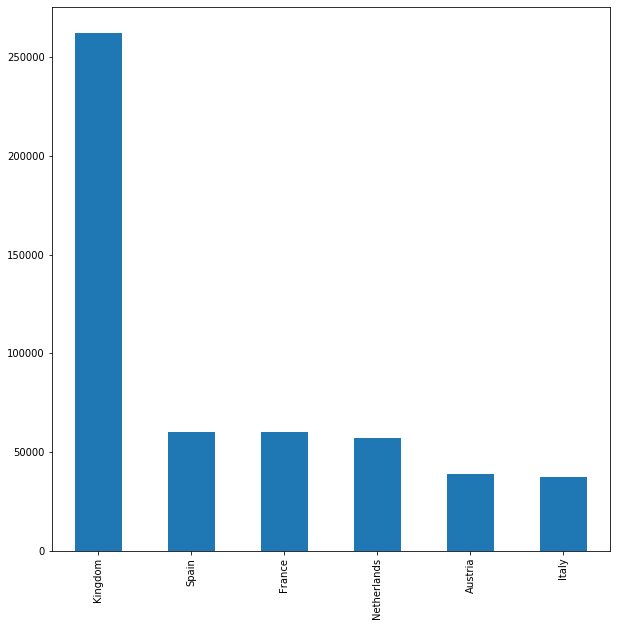

In [41]:
reviews_df['Hotel_Country'].value_counts().head(10).plot(kind='bar', figsize=(10,10))

In [44]:
reviews_df.groupby([reviews_df['Review_Date'].dt.strftime('%B'),reviews_df['Review_Date'].dt.strftime('%Y')]).count().sort_index(level=[1,0])

,,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
Review_Date,Review_Date,,,,,,,,,,,,,,,,,,
August,2015,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320,19320
December,2015,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927,17927
November,2015,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056,18056
October,2015,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486
September,2015,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738,19738
April,2016,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481,21481
August,2016,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274,27274
December,2016,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680,21680
February,2016,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856,18856


#### Is the review score affected by the nights spent in the hotel?

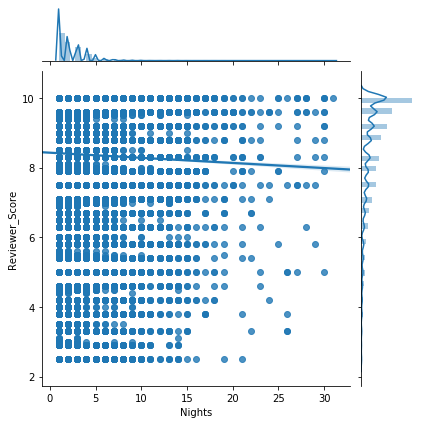

In [49]:
def splitString(string):
    array = string.split(" ', ' ")
    array[0] = array[0][3:]
    array[-1] = array[-1][:-3]
    if not 'trip' in array[0]:
        array.insert(0,None)
    try:
        return float(array[3].split()[1])
    except:
        return None

reviews_df["Nights"] = reviews_df["Tags"].apply(splitString)
sns.jointplot(data=reviews_df,y="Reviewer_Score",x="Nights",kind="reg")